In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ax80gNreKDyK5OXj9gbC")
project = rf.workspace("killua-udnjw").project("yolo-qg8ai")
version = project.version(7)
dataset = version.download("yolov7")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to YOLO-7 in yolov7pytorch:: 100%|█| 5106/51


In [3]:
dataset_location = "C:/Users/Anand/yolov7/YOLO-7"

custom_data_yaml = f"""
train: {dataset_location}/train/images
val: {dataset_location}/valid/images

nc: 7  # Number of classes
names: [Trafficlight, Speedlimit, Crosswalk, Stop, No-Uturn, Bumps, Giveway]
"""
with open('data/custom_data.yaml', 'w') as f:
    f.write(custom_data_yaml)


In [10]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


'export' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
!set PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [1]:
!python train.py --img 512 --batch 4 --epochs 10 --data data/custom_data.yaml --cfg cfg/training/yolov7.yaml --weights yolov7.pt --device 0


wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)

autoanchor: Analyzing anchors... anchors/target = 4.47, Best Possible Recall (BPR) = 1.0000
                 all         383         550       0.563       0.368       0.309       0.162
                 all         383         550       0.533       0.514       0.441       0.218
                 all         383         550       0.682       0.462        0.47       0.279
                 all         383         550       0.545       0.657       0.608        0.39
                 all         383         550       0.745       0.774       0.797       0.558
                 all         383         550       0.807       0.822       0.859       0.636
                 all         383         550       0.797       0.844       0.874        0.66
                 all         383         550       0.869       0.877        0.91       0.708
                 all         383         550       0.865       0.893      

YOLOR  v0.1-128-ga207844 torch 2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4095.5MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='data/custom_data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=10, batch_size=4, img_size=[512, 512], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs\\train\\exp5', total_batch_size=4)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mom

In [15]:
import torch

# Path to the best model weights
model_path = './runs/train/exp5/weights/best.pt'

# Load the best model state_dict directly
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Desired path to save the model weights
save_path = './yolov7_model_weights.pth'  # Adding .pth extension

# Save the state_dict directly
torch.save(state_dict, save_path)

print(f'Model weights saved to {save_path}')


C:\Users\Anand\AppData\Local\Temp\ipykernel_23244\178442729.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=torch.device

Model weights saved to ./yolov7_model_weights.pth


In [18]:
import torch
from models.yolo import Model

# Path to the best model weights
model_path = './runs/train/exp5/weights/best.pt'

# Load the state dictionary
checkpoint = torch.load(model_path, map_location=torch.device('cpu'))

# Extract the model state_dict from the checkpoint
model_state_dict = checkpoint['model'].state_dict()

# Initialize the model architecture
model = Model(cfg='cfg/training/yolov7.yaml')

# Load the state dictionary into the model
model.load_state_dict(model_state_dict)

# Desired path to save the model weights
save_path = './yolov7_model_weights.pth'

# Save the model state_dict
torch.save(model.state_dict(), save_path)

print(f'Model weights saved to {save_path}')


C:\Users\Anand\AppData\Local\Temp\ipykernel_23244\3924626611.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=torch.devic

Model weights saved to ./yolov7_model_weights.pth


C:\Users\Anand\AppData\Local\Temp\ipykernel_17884\2398253998.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./yolov7_model_weights.pt

Detected: No-Uturn 0.26


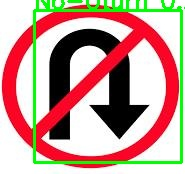

In [5]:
import torch
from models.yolo import Model
from utils.general import non_max_suppression, scale_coords
from utils.datasets import letterbox
import cv2
import numpy as np
from IPython.display import Image, display

# Load the model architecture
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model(cfg='cfg/training/yolov7.yaml').to(device)
model.load_state_dict(torch.load('./yolov7_model_weights.pth', map_location=device))
model.eval()

# Class names mapping (update this with your actual class names)
class_names = {
    0: 'Bumps',
    1: 'Crosswalk',
    2: 'Giveway',
    3: 'No-Uturn',
    4: 'Speedlimit',
    5: 'Stop',
    6: 'Trafficlight'
}

# Load an image
img_path = './test images and videos/No U-turn.jpeg'
img = cv2.imread(img_path)

# Preprocess the image
img0 = img.copy()  # original image for later
img = letterbox(img, new_shape=640)[0]  # resize image to 640
img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
img = np.ascontiguousarray(img)

# Convert image to tensor
img = torch.from_numpy(img).to(device)
img = img.float()  # uint8 to fp32
img /= 255.0  # 0 - 255 to 0.0 - 1.0
if img.ndimension() == 3:
    img = img.unsqueeze(0)

# Inference
with torch.no_grad():
    pred = model(img, augment=False)[0]

# Apply NMS (Non-Maximum Suppression)
pred = non_max_suppression(pred, 0.25, 0.45, classes=None, agnostic=False)

# Process detections
for i, det in enumerate(pred):  # detections per image
    if len(det):
        # Rescale boxes from img_size to img0 size
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

        # Print results
        for *xyxy, conf, cls in reversed(det):
            label = f'{class_names.get(int(cls), "Unknown")} {conf:.2f}'
            print(f'Detected: {label}')

            # Draw bounding boxes
            xyxy = torch.tensor(xyxy).view(-1).tolist()
            c1, c2 = (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3]))
            cv2.rectangle(img0, c1, c2, (0, 255, 0), 2)
            cv2.putText(img0, label, (c1[0], c1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Save the image with detections to a file
output_image_path = 'output_with_detections.jpg'
cv2.imwrite(output_image_path, img0)

# Display the saved image in the notebook
display(Image(filename=output_image_path))


In [6]:
import torch
from models.yolo import Model
from utils.general import non_max_suppression, scale_coords
from utils.datasets import letterbox
import cv2
import numpy as np

# Load the model architecture
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model(cfg='cfg/training/yolov7.yaml').to(device)
model.load_state_dict(torch.load('./yolov7_model_weights.pth', map_location=device))
model.eval()

# Class names mapping (example, you should replace it with your actual class names)
class_names = {
    0:'Bumps',
1:'Crosswalk',
2:'Giveway',
3:'No-Uturn',
4:'Speedlimit',
5:'Stop',
6:'Trafficlight'
    # Add the rest of your class names here
}

# Open the camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Reduce image resolution to improve performance
    frame = cv2.resize(frame, (640, 480))

    # Preprocess the frame
    img = frame.copy()
    img = letterbox(img, new_shape=640)[0]  # resize image to 640
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)

    # Convert image to tensor
    img = torch.from_numpy(img).to(device)
    img = img.float()  # uint8 to fp32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    # Inference
    with torch.no_grad():
        pred = model(img, augment=False)[0]

    # Apply NMS (Non-Maximum Suppression)
    pred = non_max_suppression(pred, 0.25, 0.45, classes=None, agnostic=False)

    # Process detections
    for i, det in enumerate(pred):  # detections per image
        if len(det):
            # Rescale boxes from img_size to original frame size
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], frame.shape).round()

            # Print results and draw bounding boxes
            for *xyxy, conf, cls in reversed(det):
                label = f'{class_names[int(cls)]} {conf:.2f}'  # Use class name instead of number
                print(f'Detected: {label}')

                # Draw bounding boxes
                xyxy = torch.tensor(xyxy).view(-1).tolist()
                c1, c2 = (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3]))
                cv2.rectangle(frame, c1, c2, (0, 255, 0), 2)
                cv2.putText(frame, label, (c1[0], c1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Display the frame with detections
    cv2.imshow('Live Detection', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


C:\Users\Anand\AppData\Local\Temp\ipykernel_17884\474505036.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./yolov7_model_weights.pth

Detected: Speedlimit 0.46
Detected: Speedlimit 0.30
Detected: Trafficlight 0.38
Detected: Speedlimit 0.30
Detected: Trafficlight 0.41
Detected: Speedlimit 0.34
Detected: Trafficlight 0.41
Detected: Trafficlight 0.55
Detected: Speedlimit 0.57
Detected: Trafficlight 0.40
Detected: Speedlimit 0.55
Detected: Trafficlight 0.28
Detected: No-Uturn 0.30
Detected: No-Uturn 0.80
Detected: No-Uturn 0.71
Detected: No-Uturn 0.37
Detected: No-Uturn 0.35
Detected: No-Uturn 0.31
Detected: No-Uturn 0.32
Detected: No-Uturn 0.30
Detected: No-Uturn 0.27
Detected: No-Uturn 0.33
Detected: No-Uturn 0.31
Detected: No-Uturn 0.27
Detected: No-Uturn 0.29
Detected: Speedlimit 0.49
Detected: Trafficlight 0.77
Detected: Trafficlight 0.38
Detected: Speedlimit 0.42
Detected: Speedlimit 0.29
Detected: Speedlimit 0.36
Detected: Speedlimit 0.40
Detected: Trafficlight 0.42
Detected: Trafficlight 0.37
Detected: Speedlimit 0.36
Detected: Trafficlight 0.27
Detected: Trafficlight 0.27
Detected: Trafficlight 0.28
Detected: Tr

KeyboardInterrupt: 